## Probability Desnity Function (PDF) Generator

This Notebook aims at generating the PDF of signed Euclidean distance of relative performances for DmPerf-Esitmation. Methods include Heuristic Processing, Linear Regression, Decision Tree Regression, and Multi-Layer Perceptron. 

Import appropriate libraries and define paths to ground truth and prediciton data.

In [7]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

data_base_dir = "../Py_Data_Res"

data_files = {
    "CompL": os.path.join(data_base_dir, "p_Comp_L_1000.csv"),
    "Linear": os.path.join(data_base_dir, "p_Linear_1000.csv"),
    "DTree": os.path.join(data_base_dir, "p_Dtree_1000.csv"),
    "MLP": os.path.join(data_base_dir, "p_MLP_L_1000.csv")
}

gtruth_file = os.path.join(data_base_dir, "y_10000.csv")

print(data_files)
print(gtruth_file)

{'CompL': '../Py_Data_Res/p_Comp_L_1000.csv', 'Linear': '../Py_Data_Res/p_Linear_1000.csv', 'DTree': '../Py_Data_Res/p_Dtree_1000.csv', 'MLP': '../Py_Data_Res/p_MLP_L_1000.csv'}
../Py_Data_Res/y_10000.csv


Read data from CSV files, compute the realative performance, get the distances and print them.

In [8]:
def read_csv_to_list(file_path):
    column_data = []
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            column_data.append(float(row[0]))
    return column_data

def get_rel_perf(d):
    res = []
    for i in range(len(d)-1):
        res.append((d[i+1]-d[i])/d[i])
    return res

def get_dist(a, b):
    sign = 1 if a*b == 0 else (a*b)/abs(a*b) 
    dist = abs(a-b)
    return sign * dist

def get_dists(gtruth, pred):
    return [get_dist(t, p) for t, p in zip(gtruth, pred)]

def process_file(pth, gtruth):
    d = read_csv_to_list(pth)
    d = get_rel_perf(d)
    if gtruth is not None:
        print(pth)
        d = get_dists(gtruth, d)
    return d

gtruth = process_file(gtruth_file, None)
dists = {name: process_file(pth, gtruth) for name, pth in data_files.items()}
print(dists)

../Py_Data_Res/p_Comp_L_1000.csv
../Py_Data_Res/p_Linear_1000.csv
../Py_Data_Res/p_Dtree_1000.csv
../Py_Data_Res/p_MLP_L_1000.csv
{'CompL': [0.03885781076605571, 0.05917173912262632, 0.06490806397654503, 0.1150860697139369, 0.13058166129979826, 0.014312942776258272, 0.04263307770441696, 0.00799109451214685, 0.061600873192794364, 0.01909354284103114, 0.019762361042383294, 0.16277921616927835, 0.1136391957554401, 0.15816003988885494, 0.05344438224948709, -0.045417961797172605, 0.06197483056624978, 0.06396814519301933, 0.0007315837816457907, 0.01677708504447413, 0.005493874233698825, 0.03875167610905755, 0.019319559670305995, 0.0482432848644124, 0.0010678217884787624, -0.010659562995760777, -0.016254965885081785, 0.09579260736081868, 0.05937401804098998, 0.015309018331192407, 0.0746931800633897, 0.05715736365277164, 0.03075149603265681, 0.0549032656583864, 0.02914657593703291, 0.005929614457577663, -0.0649539085244639, 0.056774725166630666, -0.017277833094334574, 0.04344878260196835, 0.00

### Compute the estimated PDF given the array of distances. 

For this, use Kernel Density Estimation (KDE) as describe in:
https://en.wikipedia.org/wiki/Kernel_density_estimation
 
Specifically, we will use Gaussian KDE from SciPy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html



In [9]:
def get_pdf(data):
    data = np.array(data)
    # print(data.shape, data[:10])
    kde = gaussian_kde(data)

    x_range = np.linspace(data.min()-1, data.max()+1, 1000)
    pdf_values = kde(x_range)

    # plt.plot(x_range, pdf_values, label=name)
    # plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram')
    return (x_range, pdf_values)

pdfs = {}
for k, v in dists.items():
    pdfs[k] = get_pdf(v)

print("PDFs ready!")


PDFs ready!


Now that the PDF estimates are ready, we can proceed to plotting them. We will first plot them individually and then combined. 

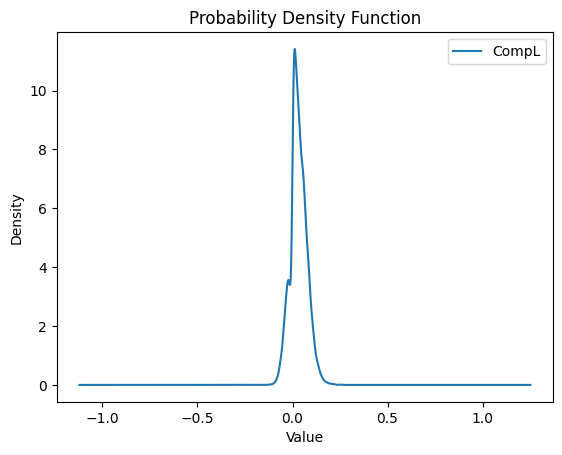

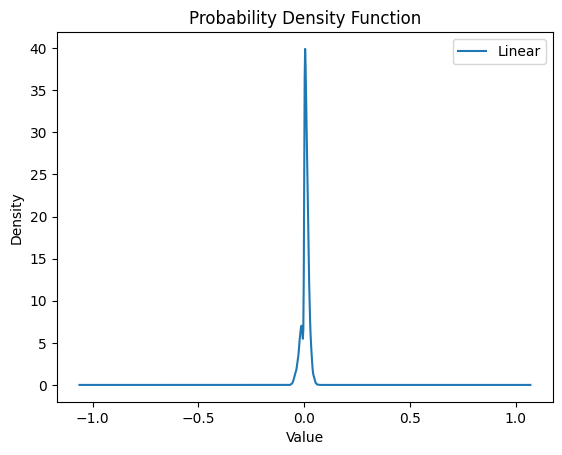

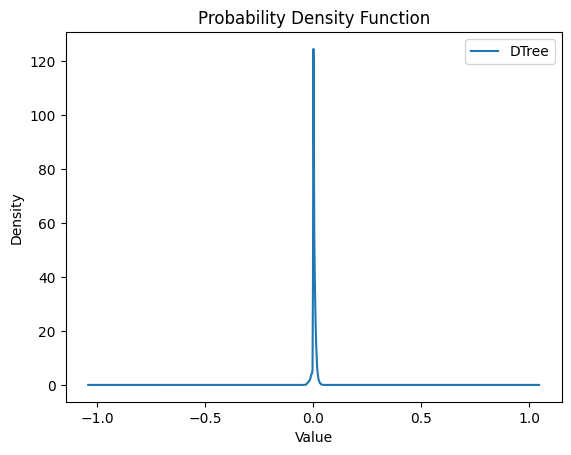

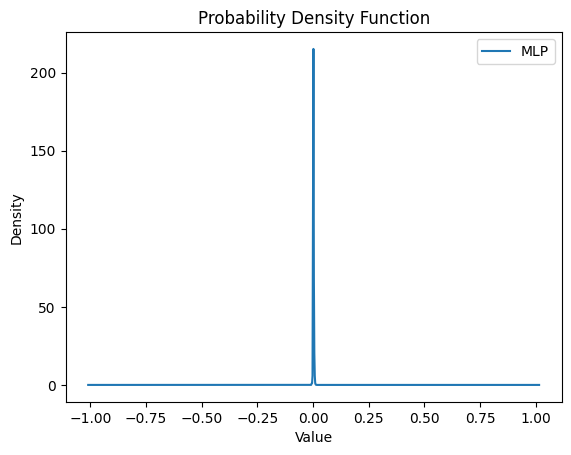

In [10]:
for k, v in pdfs.items():
    plt.plot(v[0], v[1], label=k)
    plt.legend()
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Probability Density Function')
    plt.show()

As expected, the more accurate models result in a narrower and taller PDFs. Next, let's combine all the PDFs in one figure:

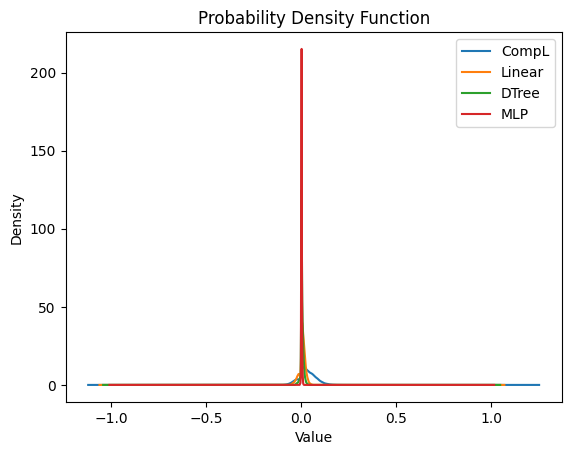

In [11]:
for k, v in pdfs.items():
    plt.plot(v[0], v[1], label=k)
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.show()

Not so readable. Limiting the x-axis will provide a more readble figure:

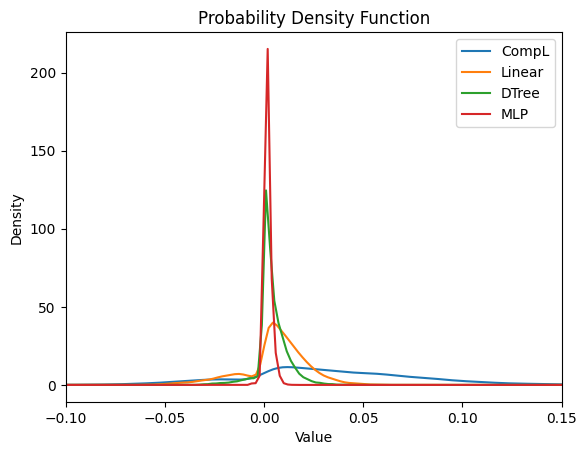

In [12]:
for k, v in pdfs.items():
    # y_norm = v[1] / np.max(v[1])
    plt.plot(v[0], v[1], label=k)
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.xlim(-0.1,0.15)
plt.show()